In [1]:
! source ../venv/bin/activate

In [2]:
! which python

/Users/JMECKEL/development/projects/python/udacity_boarding_kiosk/venv/bin/python


In [3]:
import sys
print(sys.executable)

/Users/JMECKEL/development/projects/python/udacity_boarding_kiosk/venv/bin/python


In [4]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.ai.documentintelligence.models import AnalyzeResult
from PIL import Image
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

In [5]:
load_dotenv()

AZURE_DOC_INTEL_ENDPOINT = os.getenv("AZURE_DOC_INTEL_ENDPOINT")
AZURE_DOC_INTEL_KEY = os.getenv("AZURE_DOC_INTEL_KEY")

In [6]:
endpoint = AZURE_DOC_INTEL_ENDPOINT
key = AZURE_DOC_INTEL_KEY

In [7]:
document_intelligence_client = DocumentIntelligenceClient(endpoint=endpoint, credential=AzureKeyCredential(key))

In [8]:
!ls ../starter/digital_id_template/

avkash.png               ca-dl-radha-s-kumar.png  james-webb.png
ca-dl-avkash-chauhan.png ca-dl-sameer-kumar.png   libby-herold.png
ca-dl-avkash.png         ca-dl-sample.png         radha-s-kumar.png
ca-dl-james-jackson.png  ca-dl-template.png       sameer-kumar.png
ca-dl-james-webb.png     digital_id_template.pdf
ca-dl-libby-herold.png   james-jackson.png


In [9]:
input_id = "../starter/digital_id_template/ca-dl-james-webb.png"

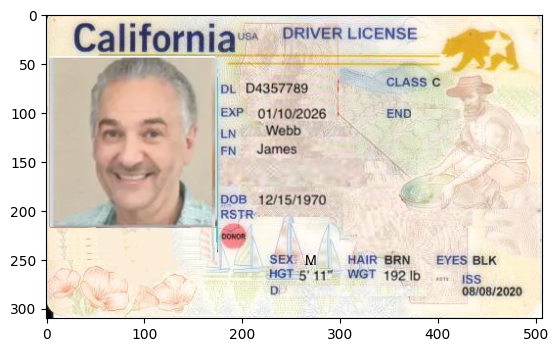

In [10]:
with open(input_id, 'rb') as img_code:
    img_view_ready = Image.open(img_code)
    plt.figure()
    plt.imshow(img_view_ready)

In [11]:
with open(input_id, "rb") as f:
    poller = document_intelligence_client.begin_analyze_document(model_id="prebuilt-idDocument", body=f)
result_data: AnalyzeResult = poller.result()

In [12]:
result_data

{'apiVersion': '2024-11-30', 'modelId': 'prebuilt-idDocument', 'stringIndexType': 'textElements', 'content': 'California\nUSA\nDRIVER LICENSE\nDL D4357789\nCLASS C\nEXP\n01/10/2026\nEND\nLN Webb\nFN James\nDOB 12/15/1970\nRSTR\nDONOR\nSEX M\nHAIR BRN\nEYES BLK\nHGT 5\' 11"\nWGT 192 lb\nISS\nD\n08/08/2020', 'pages': [{'pageNumber': 1, 'angle': 0.12117110192775726, 'width': 507, 'height': 310, 'unit': 'pixel', 'words': [{'content': 'California', 'polygon': [27, 7, 196, 9, 196, 42, 27, 41], 'confidence': 0.995, 'span': {'offset': 0, 'length': 10}}, {'content': 'USA', 'polygon': [196, 17, 218, 17, 218, 28, 197, 28], 'confidence': 0.992, 'span': {'offset': 11, 'length': 3}}, {'content': 'DRIVER', 'polygon': [240, 11, 303, 11, 303, 27, 240, 28], 'confidence': 0.995, 'span': {'offset': 15, 'length': 6}}, {'content': 'LICENSE', 'polygon': [308, 11, 381, 11, 381, 28, 308, 27], 'confidence': 0.993, 'span': {'offset': 22, 'length': 7}}, {'content': 'DL', 'polygon': [178, 68, 198, 69, 198, 82, 178

## Processing Results

In [13]:
len(result_data)

8

In [14]:
fields = result_data.documents[0].fields

In [15]:
print(fields)

{'CountryRegion': {'type': 'countryRegion', 'valueCountryRegion': 'USA', 'confidence': 0.995}, 'DateOfBirth': {'type': 'date', 'valueDate': '1970-12-15', 'content': '12/15/1970', 'boundingRegions': [{'pageNumber': 1, 'polygon': [217, 183, 287, 183, 287, 196, 217, 195]}], 'confidence': 0.654, 'spans': [{'offset': 90, 'length': 10}]}, 'DateOfExpiration': {'type': 'date', 'valueDate': '2026-01-10', 'content': '01/10/2026', 'boundingRegions': [{'pageNumber': 1, 'polygon': [215, 95, 288, 95, 288, 108, 215, 108]}], 'confidence': 0.771, 'spans': [{'offset': 54, 'length': 10}]}, 'DateOfIssue': {'type': 'date', 'valueDate': '2020-08-08', 'content': '08/08/2020', 'boundingRegions': [{'pageNumber': 1, 'polygon': [424, 277, 488, 277, 488, 289, 425, 288]}], 'confidence': 0.668, 'spans': [{'offset': 164, 'length': 10}]}, 'DocumentNumber': {'type': 'string', 'valueString': 'D4357789', 'content': 'D4357789', 'boundingRegions': [{'pageNumber': 1, 'polygon': [204, 69, 269, 68, 269, 82, 204, 82]}], 'conf

In [16]:
first_name = fields.get("FirstName").get("valueString") if (fields.get("FirstName") and fields.get("FirstName").get("valueString")) else None
last_name = fields.get("LastName").get("valueString") if (fields.get("LastName") and fields.get("LastName").get("valueString")) else None
date_of_birth = fields.get("DateOfBirth").get("valueDate") if (fields.get("DateOfBirth") and fields.get("DateOfBirth").get("valueDate")) else None

print("First Name:", first_name)
print("Last Name:", last_name)
print("Date of Birth:", date_of_birth)

First Name: James
Last Name: Webb
Date of Birth: 1970-12-15
